In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# load file
clean_df2 = pd.read_csv('clean.csv')
clean_df2

,Unnamed: 0,Unique ID,Household region,Age of sample adult,Sex of sample adult,Education of sample adult,Hispanic ethnicity of SA,Single + Mult race gps w Hispanic origin,Hispanic origin detail,Single and multiple race groups,...,Medicaid HDHP.1,Medicaid reassignment flag,Paid for by Medicare - plan 1,Paid for by Medicare - plan 2,"Not eligible for Medicaid, CHIP, or other public coverage",SA family poverty ratio,Ratio of family income to poverty threshold for SA’s family,income from wages,income from SSI SSDI,income from retirement
0,0,H056808,3,50,1,1,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,1.93,7,1,2.0,2.0
1,1,H018779,3,53,1,7,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,4.45,12,1,2.0,2.0
2,2,H049265,3,56,1,8,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,5.94,14,1,2.0,2.0
3,3,H007699,3,57,2,5,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,3.70,11,1,1.0,1.0
4,4,H066034,3,25,1,4,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,1.66,6,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,29477,H012375,4,70,2,9,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,5.11,14,2,2.0,2.0
29478,29478,H052160,4,35,2,7,1,1,2,8,...,NaN,NaN,2.0,NaN,NaN,3.03,10,1,2.0,2.0
29479,29479,H051563,4,72,2,4,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,2.07,8,2,2.0,2.0
29480,29480,H058432,4,58,1,5,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,2.05,8,2,1.0,2.0


In [3]:
# columns in the df
clean_df2.columns

Index(['Unnamed: 0', 'Unique ID', 'Household region', 'Age of sample adult',
       'Sex of sample adult', 'Education of sample adult',
       'Hispanic ethnicity of SA', 'Single + Mult race gps w Hispanic origin',
       'Hispanic origin detail', 'Single and multiple race groups',
       'General health status', 'Ever had Diabetes?', 'Ever had pre-diabetes?',
       'Taking diabetic pills', 'Taking insuliin', 'Diabetes type',
       'Ever had weak/failing kidneys', 'Weight without shoes (pounds)',
       'Categorical Body Mass Index', 'Health insurance hierarchy under 65',
       'Health insurance hierarchy under 65.1', 'Type of Medicare coverage',
       'Enrolled in Medicare Advantage Plan', 'Medicare HMO',
       'Medicare Advantage Plan', 'Medicare Part D',
       'Medicaid through Marketplace ', 'Medicaid premium',
       'Medicaid deductible', 'Medicaid HDHP', 'Medicaid HDHP.1',
       'Medicaid reassignment flag', 'Paid for by Medicare - plan 1',
       'Paid for by Medicare - 

In [4]:
# null values for each columns
for column in clean_df2.columns:
    print( f'Column {column} has {clean_df2[column].isnull().sum()} null values.' )

Column Unnamed: 0 has 0 null values.
Column Unique ID has 0 null values.
Column Household region has 0 null values.
Column Age of sample adult has 0 null values.
Column Sex of sample adult has 0 null values.
Column Education of sample adult has 0 null values.
Column Hispanic ethnicity of SA has 0 null values.
Column Single + Mult race gps w Hispanic origin has 0 null values.
Column Hispanic origin detail has 0 null values.
Column Single and multiple race groups has 0 null values.
Column General health status has 0 null values.
Column Ever had Diabetes? has 0 null values.
Column Ever had pre-diabetes? has 0 null values.
Column Taking diabetic pills has 23780 null values.
Column Taking insuliin has 23780 null values.
Column Diabetes type has 26348 null values.
Column Ever had weak/failing kidneys has 0 null values.
Column Weight without shoes (pounds) has 0 null values.
Column Categorical Body Mass Index has 0 null values.
Column Health insurance hierarchy under 65 has 8908 null values.


Columns with lots o null values: insurance-related.

The age of sample adult col. is on a different scale than the other columns.  It needs to have a similar scale on all the variables in order to use unsupervised learning algorithms. So the age column should be rescaled.  

In [5]:
# transform the age col.
clean_df2['Age of sample adult'] = clean_df2['Age of sample adult'] / 10
clean_df2.head(5)

,Unnamed: 0,Unique ID,Household region,Age of sample adult,Sex of sample adult,Education of sample adult,Hispanic ethnicity of SA,Single + Mult race gps w Hispanic origin,Hispanic origin detail,Single and multiple race groups,...,Medicaid HDHP.1,Medicaid reassignment flag,Paid for by Medicare - plan 1,Paid for by Medicare - plan 2,"Not eligible for Medicaid, CHIP, or other public coverage",SA family poverty ratio,Ratio of family income to poverty threshold for SA’s family,income from wages,income from SSI SSDI,income from retirement
0,0,H056808,3,5.0,1,1,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,1.93,7,1,2.0,2.0
1,1,H018779,3,5.3,1,7,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,4.45,12,1,2.0,2.0
2,2,H049265,3,5.6,1,8,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,5.94,14,1,2.0,2.0
3,3,H007699,3,5.7,2,5,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,3.70,11,1,1.0,1.0
4,4,H066034,3,2.5,1,4,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,1.66,6,8,NaN,NaN


In [6]:
df = clean_df2[ ['Age of sample adult', 
                'Sex of sample adult', 
                'Education of sample adult', 
                'Ever had Diabetes?', 
                'Categorical Body Mass Index'] ].copy()
df

,Age of sample adult,Sex of sample adult,Education of sample adult,Ever had Diabetes?,Categorical Body Mass Index
0,5.0,1,1,2,3
1,5.3,1,7,1,3
2,5.6,1,8,2,3
3,5.7,2,5,2,4
4,2.5,1,4,2,4
...,...,...,...,...,...
29477,7.0,2,9,2,3
29478,3.5,2,7,1,4
29479,7.2,2,4,2,3
29480,5.8,1,5,2,2


In [7]:
df = df.dropna()
df

,Age of sample adult,Sex of sample adult,Education of sample adult,Ever had Diabetes?,Categorical Body Mass Index
0,5.0,1,1,2,3
1,5.3,1,7,1,3
2,5.6,1,8,2,3
3,5.7,2,5,2,4
4,2.5,1,4,2,4
...,...,...,...,...,...
29477,7.0,2,9,2,3
29478,3.5,2,7,1,4
29479,7.2,2,4,2,3
29480,5.8,1,5,2,2


In [8]:
# get_dummies
X = pd.get_dummies(df, columns=['Sex of sample adult',
                                'Education of sample adult',
                                'Ever had Diabetes?',
                               'Categorical Body Mass Index'] )
X

,Age of sample adult,Sex of sample adult_1,Sex of sample adult_2,Sex of sample adult_7,Sex of sample adult_9,Education of sample adult_1,Education of sample adult_2,Education of sample adult_3,Education of sample adult_4,Education of sample adult_5,...,Education of sample adult_99,Ever had Diabetes?_1,Ever had Diabetes?_2,Ever had Diabetes?_7,Ever had Diabetes?_9,Categorical Body Mass Index_1,Categorical Body Mass Index_2,Categorical Body Mass Index_3,Categorical Body Mass Index_4,Categorical Body Mass Index_9
0,5.0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,5.3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,5.6,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,5.7,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,2.5,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,7.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
29478,3.5,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
29479,7.2,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
29480,5.8,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [9]:
# standardize the data with StandardScaler()
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[-0.14212283  1.09716333 -1.0970132  ...  1.40459064 -0.67483193
  -0.15967636]
 [ 0.02018215  1.09716333 -1.0970132  ...  1.40459064 -0.67483193
  -0.15967636]
 [ 0.18248712  1.09716333 -1.0970132  ...  1.40459064 -0.67483193
  -0.15967636]
 ...
 [ 1.04811366 -0.91144132  0.91156606 ...  1.40459064 -0.67483193
  -0.15967636]
 [ 0.29069044  1.09716333 -1.0970132  ... -0.71195121 -0.67483193
  -0.15967636]
 [ 0.23658878 -0.91144132  0.91156606 ... -0.71195121  1.48185045
  -0.15967636]]


In [21]:
# find k
sse = {}
K = range(1,50)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k] = kmeanmodel.inertia_

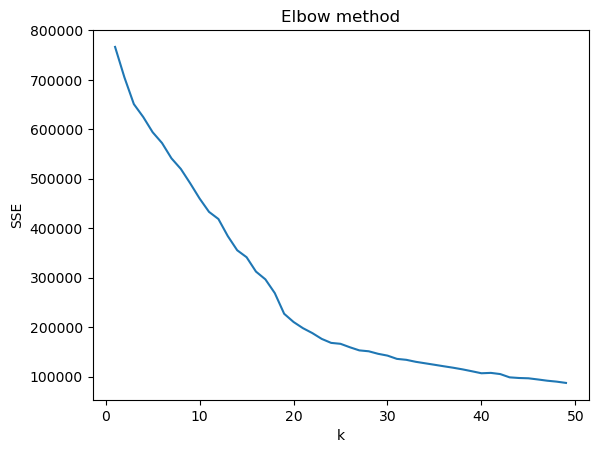

In [22]:
# plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow method')
plt.show()

In [23]:
# create a KMeans model with 3 clusters
model = KMeans(n_clusters=18, random_state=42).fit(X_scaled)

In [24]:
# calculate predicted values
y_pred = model.predict(X_scaled)
y_pred

array([16,  4,  3, ...,  1,  0,  4], dtype=int32)

In [25]:
# make a df for the 3 clusters
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
df_y

,Cluster
0,16
1,4
2,3
3,0
4,16
...,...
29477,2
29478,4
29479,1
29480,0


In [26]:
# Add prediected values onto the original dataframe
combined = df.join(df_y, how='inner')
combined

,Age of sample adult,Sex of sample adult,Education of sample adult,Ever had Diabetes?,Categorical Body Mass Index,Cluster
0,5.0,1,1,2,3,16
1,5.3,1,7,1,3,4
2,5.6,1,8,2,3,3
3,5.7,2,5,2,4,0
4,2.5,1,4,2,4,16
...,...,...,...,...,...,...
29477,7.0,2,9,2,3,2
29478,3.5,2,7,1,4,4
29479,7.2,2,4,2,3,1
29480,5.8,1,5,2,2,0


In [27]:
pca = PCA(n_components=2)

data_pca = pca.fit_transform(X_scaled)
data_pca

array([[ 0.57554502, -1.8519258 ],
       [ 4.0060861 , -0.43115009],
       [-0.01676145, -2.16392288],
       ...,
       [-0.25657897,  0.57878872],
       [-0.39211598, -1.14710028],
       [ 3.69448315,  2.72155865]])

In [28]:
df_pca = pd.DataFrame(
    data=data_pca, columns=['pc1', 'pc2'] )
df_pca

,pc1,pc2
0,0.575545,-1.851926
1,4.006086,-0.431150
2,-0.016761,-2.163923
3,-0.242351,1.395928
4,0.515960,-1.434818
...,...,...
29477,-0.788188,0.578784
29478,3.247677,2.726585
29479,-0.256579,0.578789
29480,-0.392116,-1.147100


In [29]:
df_pca['class'] = model.labels_
df_pca

,pc1,pc2,class
0,0.575545,-1.851926,16
1,4.006086,-0.431150,4
2,-0.016761,-2.163923,3
3,-0.242351,1.395928,0
4,0.515960,-1.434818,16
...,...,...,...
29477,-0.788188,0.578784,2
29478,3.247677,2.726585,4
29479,-0.256579,0.578789,1
29480,-0.392116,-1.147100,0


In [30]:
pca.explained_variance_ratio_

array([0.08666291, 0.08029991])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

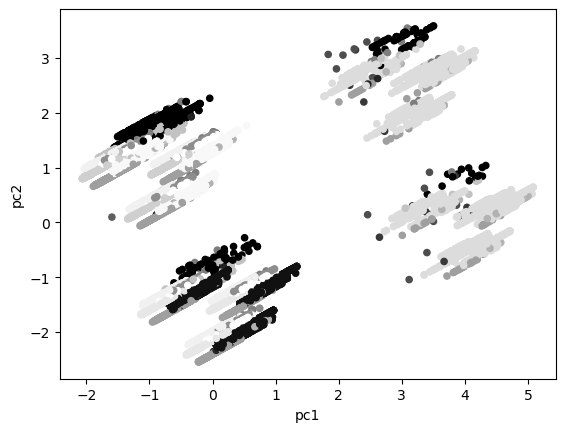

In [31]:
df_pca.plot(x='pc1', y='pc2', kind='scatter', c=df_pca['class'])